In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#### 1. Function to drop the i-th columns.

In [32]:
def drop(data:pd.DataFrame, i:int):
  '''
    Takes an index as a parameter and delete the corresponding feature.
    i: index of the feature to remove.
  '''
  data = data.drop(data.columns[i], axis=1)


### 2. Function that plot the ith column values

In [33]:
def plot_i_th_column(data:pd.DataFrame, i:int):
    """
    Juns sashu function to plot out the i-th attribute of a given dataset by index
    :param data: the Dataset that we want to plot out the given attribute index 
    :param i: the index of the attribute in the columns list
    :return: nothing just plot out the i-th attributes values
    """
    plt.plot(data[data.columns[i]], "ob")
    plt.xlabel("observations")
    plt.ylabel(data.columns[i])
    plt.title(f"Nuage de points de {data.columns[i]}")
    plt.show()

#### 3. Function to plots COTIS_BDG feature by COTIS_VOl (as a scatter plot) and the corresponding regression line. 

In [34]:
def scatterplot(data:pd.DataFrame):
  '''
    Plot COTIS_BDG feature by COTIS_VOl as a scatter plot.
    Plot the corresponding regression line.
    
    data:The dataset to work on
  '''
  sns.scatterplot(data=data, x="COTIS_VOL", y="COTIS_BDG")
  x, y = np.array(data["COTIS_VOL"]).reshape((-1, 1)), np.array(data["COTIS_BDG"])
  model = LinearRegression().fit(x, y)
  Y = model.predict(x)
  plt.plot(x, Y)
  plt.title('Scatter plot and regression line of COTIS_BDG by COTIS_VOL')
  plt.xlabel('COTIS_VOL')
  plt.ylabel('COTIS_BDG')
  
  plt.show()

### 4. Function pie diagram and boxplot of the i-th variable value

In [35]:
def box_pie_i_th(data:pd.DataFrame, i:int):
    """
    Juns sashu function to plot out the pie and box diagram of the i-th attribute of a given dataset by index
    :param data: the Dataset that we want to plot out the given attribute index 
    :param i: the index of the attribute in the columns list
    :return: nothing just plot out pie and box plot of the i-th attributes values
    """
    fig, axes = plt.subplots(1, 2)
    
    axes[0].pie(data[data.columns[i]])
    axes[0].set_title("Diagramme Circulaire")
    axes[1].boxplot(data[data.columns[i]])
    axes[0].set_title("Boite a moustache")
    
    plt.tight_layout()
    plt.show()

#### 5. Function to retrieve mean and standar deviation of features: COTIS_BDG, COTIS_VOL, COTIS_DOM.

In [36]:
def carinfos(data:pd.DataFrame, car:str=None):
  '''
    Takes a car's name as parameter and display the mean and standard deviation of
    the following features: COTIS_BDG, COTIS_VOL, COTIS_DOM 
  '''
  if car:
    cars = data.loc[data["MARQUE"]==car, :]
    to_print = pd.DataFrame(
        data=0.0,
        index=pd.Index(['mean', 'std']),
        columns=['COTIS_BDG', 'COTIS_VOL', 'COTIS_DOM']
      )
    
    for feature in to_print.columns:
      to_print.loc['mean', feature] = cars.describe().loc['mean', feature]
      to_print.loc['std', feature] = cars.describe().loc['std', feature]
    
    print(to_print)
  else:
    print('No car submitted')
    


### 6. Function hist plot of COTIS_DBG, COTIS_VOL, by SEXE

In [37]:
def cotis_bdg_cotis_vol_by_sexe(data:pd.DataFrame, attr1:str="COTIS_BDG", attr2:str="COTIS_VOL", attr3:str="SEXE"):
    """
    Juns Sashu Function that plot out the values as hist plot of attr1 and attr2 by attr3
    :param data: the given dataset 
    :param attr1: the first target 
    :param attr2: the second target 
    :param attr3: the value of x on hist
    :return: nothing but plot out as hist the values  
    """
    fig, axes = plt.subplots(1, 2)
    
    # Séparez les données en deux groupes : "bM" et "bF"
    data_bM = data[data[attr3] == "bM"]
    data_bF = data[data[attr3] == "bF"]

    axes[0].hist(data_bM[attr1], label="bM", alpha=0.5)
    axes[0].hist(data_bF[attr1], label="bF", alpha=0.5)
    axes[0].set_title(f"{attr1} hist by {attr3}")
    axes[0].legend()

    axes[1].hist(data_bM[attr2], label="bM", alpha=0.5)
    axes[1].hist(data_bF[attr2], label="bF", alpha=0.5)
    axes[1].set_title(f"{attr2} hist by {attr3}")
    axes[1].legend()
    
    plt.show()

#### 7. Function to retrieve COTIS_BDG, COTIS_VOL and COTIS_DOM values sums by year.

In [38]:
def histsum(data:pd.DataFrame):
  '''
    Plot for each year the sum of columns COTIS_BDG, COTIS_VOL, COTIS_DOM values.
  '''
  dates = np.unique(np.array([date.year for date in data['DAT_DEB']]))
  labels = ['COTIS_BDG', 'COTIS_VOL', 'COTIS_DOM']
  to_print = pd.DataFrame(data=0.0, index=pd.Index(dates), columns=labels)

  for i in data.index:
    year = data.loc[i, 'DAT_DEB'].year
    for j in labels:
      to_print.loc[year, j] += data.loc[i, j]
  
  fig, axis = plt.subplots(nrows=1, ncols=dates.shape[0]+1, figsize=(13, 4))
  
  for _ in range(dates.shape[0]):
    axis[_].bar(labels, to_print.loc[dates[_], :])
    axis[_].set_title('Year {}'.format(dates[_]))
    axis[_].set_xlabel('Years')
    axis[_].set_ylabel('Sum')
  fig.suptitle('Bar-plotting the sum of the following features values: COTIS_BDG, COTIS_VOL, COTIS_DOM')
  plt.show()


### Loading the dataset

In [39]:
data = pd.read_excel("Risques.xlsx")
data.index = pd.Index(data['Unnamed: 0'])
data = data.drop('Unnamed: 0', axis=1)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18737 entries, 0 to 18736
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CLERISQ     18737 non-null  object        
 1   CLE_RISQ    18737 non-null  int64         
 2   NUM_SOC     18737 non-null  object        
 3   NUM_SOC.1   18736 non-null  float64       
 4   NUM_CONT    18737 non-null  object        
 5   NUM_CONT.1  18737 non-null  int64         
 6   DAT_DEB     18737 non-null  datetime64[ns]
 7   DAT_FIN     18737 non-null  datetime64[ns]
 8   SEXE        18737 non-null  object        
 9   SEXE.1      18737 non-null  object        
 10  MARQUE      18737 non-null  object        
 11  MARQUE.1    18737 non-null  object        
 12  CD_USAG     18737 non-null  object        
 13  CD_USAG.1   18737 non-null  object        
 14  COEF        18737 non-null  object        
 15  COEF.1      18737 non-null  int64         
 16  ZONE        18737 non-null 

## Applying previously declared functions to the dataset. 

#### I. Dimension reduction
The dataset was given without any features description. The following operations will be done solely on supposition.

1. There, will only be removed features that seemingly give useless informations, namely:
- The features in double
- ...
2. Missing values will be replaced by either the mean of the corresponding feature (for numerical features) or the most remanent value (for nominal features) 

In [41]:
labels = list(data.columns)
cleaned_data = pd.DataFrame(data)
l = len(labels)
i = 0
while i < l:
    if labels[i] in labels[i+1] or labels[i].lower() == labels[i+1].lower() or labels[i].lower() == 'clerisq':
        name = labels[i]
        cleaned_data = cleaned_data.drop(labels[i], axis=1)
        labels.pop(i)
        labels[i] = name
        l -= 1
    i += 1

cleaned_data.columns = pd.Index(labels)

for i in cleaned_data.columns:
    try:
        value = cleaned_data[i].mean()
        if 'int' in type(cleaned_data[i][0]):
            value = int(value)
        cleaned_data.loc[cleaned_data[i].isnull(), i] = value
    except:
        cleaned_data.loc[cleaned_data[i].isnull(), i] = cleaned_data[i].value_counts().idxmax()


cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18737 entries, 0 to 18736
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CLERISQ     18737 non-null  int64         
 1   NUM_SOC     18737 non-null  float64       
 2   NUM_CONT    18737 non-null  int64         
 3   DAT_DEB     18737 non-null  datetime64[ns]
 4   DAT_FIN     18737 non-null  datetime64[ns]
 5   SEXE        18737 non-null  object        
 6   MARQUE      18737 non-null  object        
 7   CD_USAG     18737 non-null  object        
 8   COEF        18737 non-null  int64         
 9   ZONE        18737 non-null  int64         
 10  GROUPE_sra  18737 non-null  float64       
 11  CLASSE_sra  18737 non-null  object        
 12  GAR_BDG     18737 non-null  object        
 13  GAR_VOL     18737 non-null  object        
 14  GAR_DOM     18737 non-null  object        
 15  NB_RISQ     18737 non-null  float64       
 16  COTIS_BDG   18737 non-null 

#### III. Plotting COTIS_BDG by COTIS_VOl.

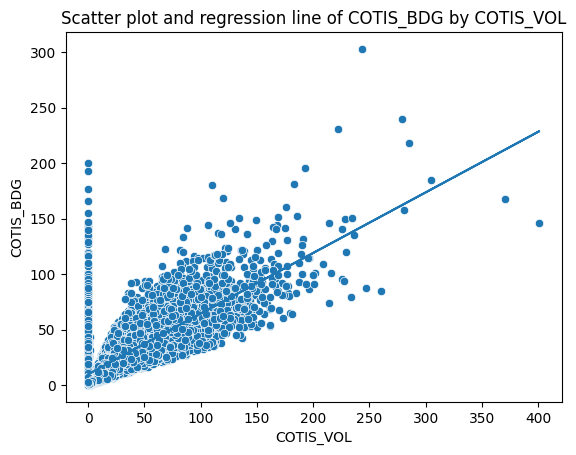

In [42]:
scatterplot(cleaned_data)

We observe a points cloud that is spreaded on both sides of the regression line and disperses alongside its ascension, meaning, these two features are actually moderately correlated.
But also, we observe a group of points, ranged aside, that have a COTIS_VOL value of zero. 

#### V. Mean and standard deviation of COTIS_BDG, COTIS_VOL, COTIS_DOM

In [43]:
cars = np.unique(cleaned_data["MARQUE"])
for car in cars:
    print(f"\n##\tInformations about {car}\t###")
    carinfos(cleaned_data, car)


##	Informations about ALFA ROM	###
      COTIS_BDG  COTIS_VOL   COTIS_DOM
mean  30.624468  36.835745  158.714574
std   21.870595  35.979088  153.252955

##	Informations about AUDI	###
      COTIS_BDG  COTIS_VOL   COTIS_DOM
mean  40.208675  44.514940  219.826355
std   29.441659  43.293436  191.196074

##	Informations about AUSTIN	###
      COTIS_BDG  COTIS_VOL  COTIS_DOM
mean  10.405455  16.078182  46.298182
std    7.792724  14.162382  47.092136

##	Informations about AUTOBIAN	###
      COTIS_BDG  COTIS_VOL  COTIS_DOM
mean  16.180000   8.770000  40.580000
std    3.252691  12.402653  57.388786

##	Informations about BMW	###
      COTIS_BDG  COTIS_VOL   COTIS_DOM
mean  44.893070  54.352690  245.687339
std   32.480904  46.067472  228.316224

##	Informations about CHEVROLE	###
      COTIS_BDG  COTIS_VOL   COTIS_DOM
mean  25.379219  29.842187  157.727500
std   21.381221  30.147323  125.555946

##	Informations about CHRYSLER	###
      COTIS_BDG  COTIS_VOL   COTIS_DOM
mean  28.582174  31.0873

We observe that, in most of the case (for each car brand), COTIS_DOM values dominate the two others.

#### VII. Plotting sums of the some features

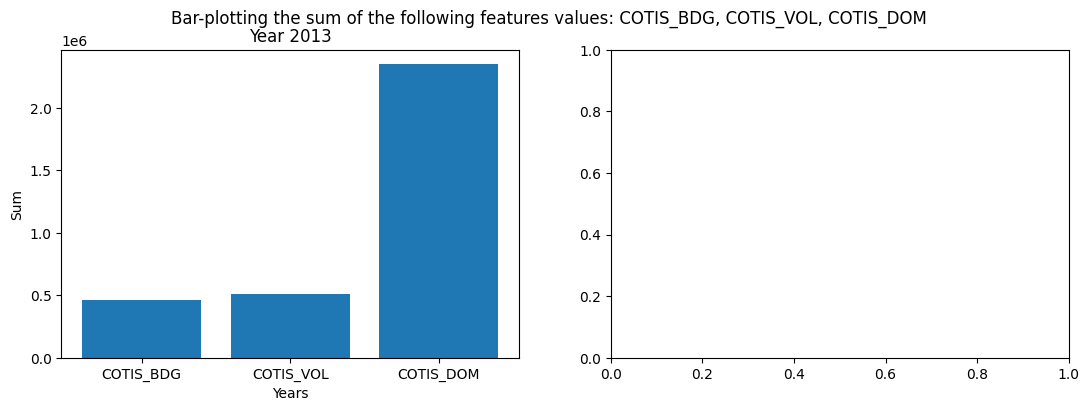

In [44]:
histsum(data)

There seems to be only datas of year 2013.
This plot confirms what was said earlier: The COTIS_DOM feature values dominate the two others.

# II. Clustering

In [88]:
def clustering_hierachique(data:pd.DataFrame, disimetrie:str="ward" ):
    """
    
    :param data: the data set
    :param disimetrie: the discimetrie distance such as ward 
    :return: nothing just plot out the dendogram
    """
    # Calcul de la matrice de liaison (linkage matrix) avec la méthode 'ward'
    linkage_matrix = linkage(data, method=disimetrie)
    
    # Affichage du dendrogramme
    dendrogram(linkage_matrix)
    
    plt.title('Dendrogramme Hiérarchique')
    plt.xlabel('Points de données')
    plt.ylabel('Distance')
    plt.show()
    
def grid_clustering(data:pd.DataFrame, grid_size:int=10, n_clusters:int=3):
    
    # Discrétiser l'espace en grilles
    grid_x = np.floor(data.iloc[:, 0] * grid_size).astype(int)
    grid_y = np.floor(data.iloc[:, 1] * grid_size).astype(int)

    # Créer des caractéristiques par cellule (moyenne des points dans chaque cellule)
    features = np.column_stack((grid_x, grid_y))
    unique_grids, counts = np.unique(features, axis=0, return_counts=True)

    # Correction de l'accès aux indices des grilles
    average_points = np.zeros((len(unique_grids), data.shape[1]), dtype=float)
    for i, grid in enumerate(unique_grids):
        average_points[i] = np.mean(data[(grid_x == grid[0]) & (grid_y == grid[1])], axis=0)

    # Appliquer un clustering sur les cellules
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(average_points)

    # Attribution des points aux clusters
    cluster_assignments = cluster_labels[np.argmin(np.linalg.norm(data.values[:, None] - average_points, axis=-1), axis=1)]

    # Ajouter les résultats au DataFrame
    data['Cluster'] = cluster_assignments

    # Afficher le diagramme de dispersion coloré par cluster
    plt.figure(figsize=(8, 6))
    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

    plt.scatter(average_points[:, 0], average_points[:, 1], marker='X', s=100, color='black', label='Centroids')
    plt.title('Résultats du Clustering par Grille')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
def generate_cliques(data: pd.DataFrame, epsilon: float = 0.3, min_pts: int = 5):
    cliques = []
    n = len(data)

    # Calculer la matrice de distances
    distances = euclidean_distances(data, data)

    for i in range(n):
        neighbors = np.where(distances[i] < epsilon)[0]

        # Vérifier si le voisinage est dense
        if len(neighbors) >= min_pts:
            clique = [i]

            for j in neighbors:
                if j != i:
                    clique.append(j)
                    j_neighbors = np.where(distances[j] < epsilon)[0]

                    # Étendre la clique
                    common_neighbors = set(neighbors) & set(j_neighbors)
                    if len(common_neighbors) >= min_pts:
                        clique.extend(list(common_neighbors))

            # Filtrer les cliques qui ne satisfont pas les critères de densité
            if len(clique) >= min_pts:
                cliques.append(set(clique))

    # Visualiser les résultats
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], label='Données', color='blue')

    for i, clique in enumerate(cliques):
        # Convertir la clique en tableau pour l'indexation
        clique_array = np.array(list(clique))
        plt.scatter(data.iloc[clique_array, 0], data.iloc[clique_array, 1], label=f'Clique {i + 1}', marker='x', s=100, color='red')

    plt.title('Résultats du Clustering CLIQUE')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show() 
    

def hierarchical_method_clustering(data):
    """
    Implémentation étape par étape de la méthode hiérarchique (agglomération ascendante).

    :param data: Les données sur lesquelles appliquer la méthode.

    :return clusters: Une liste de clusters résultants à chaque étape.
    """

    # Calcul des distances euclidiennes entre les points
    distances = np.linalg.norm(data[:, None] - data, axis=-1)

    # Chaque point de données initialement dans son propre cluster
    clusters = [[i] for i in range(len(data))]

    # Liste pour stocker les étapes du dendrogramme
    dendrogram_steps = []

    # Tant qu'il y a plus d'un cluster
    while len(clusters) > 1:
        # Trouver l'indice des clusters les plus proches
        min_distance_index = np.unravel_index(np.argmin(distances), distances.shape)

        # Fusionner les deux clusters les plus proches
        cluster1, cluster2 = clusters[min_distance_index[0]], clusters[min_distance_index[1]]
        merged_cluster = cluster1 + cluster2

        # Mettre à jour la liste des clusters
        clusters.pop(max(min_distance_index))
        clusters.pop(min(min_distance_index))
        clusters.append(merged_cluster)

        # Mettre à jour la matrice des distances en fusionnant les deux clusters
        new_distances = np.linalg.norm(data[merged_cluster][:, None] - data, axis=-1)
        distances = np.delete(distances, min_distance_index, axis=0)
        distances = np.delete(distances, min_distance_index, axis=1)

        distances = np.insert(distances, min_distance_index[0], new_distances, axis=0)
        distances = np.insert(distances, min_distance_index[0], new_distances, axis=1)

        # Ajouter l'étape actuelle du dendrogramme
        dendrogram_steps.append({
            'merge': merged_cluster.copy(),
            'height': distances[min_distance_index[0]].min(),  # Correction ici
        })

    # Création du dendrogramme
    create_dendrogram(dendrogram_steps)

    return dendrogram_steps

def create_dendrogram(dendrogram_steps):
    """
    Crée et affiche le dendrogramme à partir des étapes.

    :param dendrogram_steps: Liste des étapes du dendrogramme.
    """

    # Création des coordonnées pour les nœuds du dendrogramme
    coords = np.zeros((len(dendrogram_steps) + 1, 2))
    coords[:len(dendrogram_steps) + 1, 0] = range(len(dendrogram_steps) + 1)

    # Liste pour stocker les lignes du dendrogramme
    lines = []

    # Parcours des étapes du dendrogramme
    for step_index, step in enumerate(dendrogram_steps):
        # Coordonnée x du nœud fusionné
        x_merge = coords[step_index + len(dendrogram_steps) + 1 - len(dendrogram_steps), 0]

        # Coordonnées y des nœuds à fusionner
        y_merge1 = coords[step_index + 1 - len(dendrogram_steps), 1]
        y_merge2 = coords[step_index + 2 - len(dendrogram_steps), 1]

        # Ajout des coordonnées pour le nœud fusionné
        coords[step_index + len(dendrogram_steps) + 1, 1] = step['height']

        # Ajout de la ligne pour le nœud fusionné
        lines.append(((x_merge, y_merge1), (x_merge, y_merge2)))

    # Affichage du dendrogramme
    fig, ax = plt.subplots()
    for line in lines:
        ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='black')

    plt.title('Dendrogramme Hiérarchique')
    plt.show()


def grid_based_clustering(grid_data, threshold=0.5):
    """
    Implémentation étape par étape d'une méthode basée sur la grille pour la classification binaire.

    :param grid_data: Les données de la grille sur lesquelles appliquer la méthode.
    :param threshold: Seuil de classification.

    :return classified_grid: La grille classifiée à chaque étape.
    """

    # Initialisation de la grille classifiée
    classified_grid = np.zeros_like(grid_data)

    # Classification basée sur le seuil
    classified_grid = np.where(grid_data >= threshold, 1, 0)

    return classified_grid

def clique_clustering(graph):
    """
    Implémentation étape par étape de la méthode de clique.

    :param graph: Le graphe sur lequel appliquer la méthode de clique.

    :return cliques: Liste des cliques dans le graphe à chaque étape.
    """

    # Initialisation des cliques avec les nœuds individuels
    cliques = [frozenset([node]) for node in graph.nodes]

    # Tant qu'il y a des cliques à fusionner
    while len(cliques) > 1:
        # Trouver deux cliques à fusionner
        clique1, clique2 = max(((c1, c2) for c1 in cliques for c2 in cliques if c1.isdisjoint(c2)),
                              key=lambda x: len(x[0].union(x[1])))

        # Fusionner les deux cliques
        merged_clique = frozenset(clique1.union(clique2))

        # Mettre à jour la liste des cliques
        cliques.remove(clique1)
        cliques.remove(clique2)
        cliques.append(merged_clique)

    return list(cliques)


In [65]:
numerical_cols = [
    "PUIS_DIN",
    "COTIS_DOM",
    "COTIS_VOL",
    "COTIS_BDG",
    "NB_RISQ",
    "GROUPE_sra",
    "ZONE",
    "COEF",
    "NUM_CONT",
    "CLERISQ"
]

normalize_data = (cleaned_data[numerical_cols] - cleaned_data[numerical_cols].mean())/cleaned_data[numerical_cols].std()

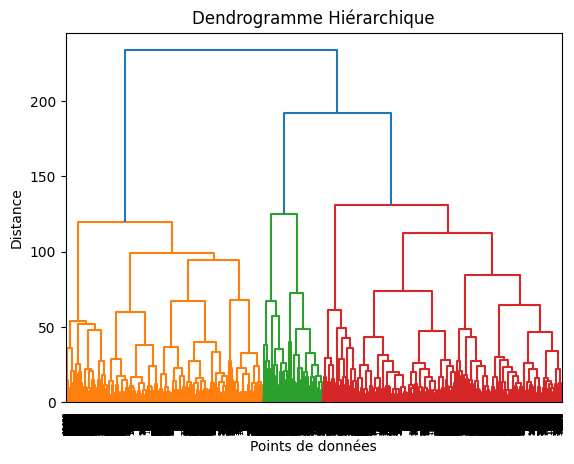

In [54]:
clustering_hierachique(normalize_data)
# Exemple d'utilisation
# result_clusters = hierarchical_method_clustering(cleaned_data)
# 
# print("Clusters finaux :", result_clusters)
# 
# 
# result_grid_classifications = grid_based_clustering(cleaned_data, threshold=0.5)
# 
# print("Grilles classifiées à chaque étape :", result_grid_classifications)
# 
# 
# result_cliques = clique_clustering(cleaned_data)
# 
# print("Cliques finales :", result_cliques)



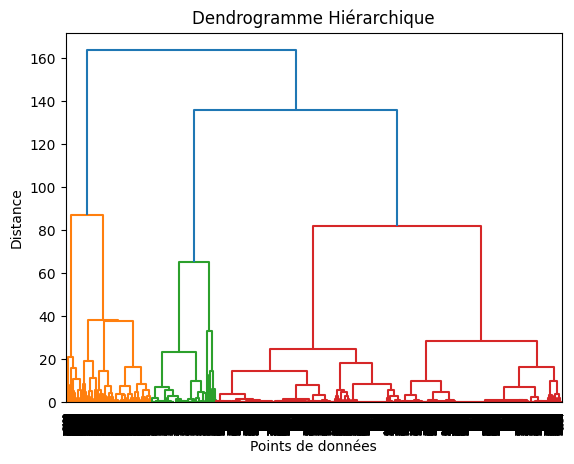

In [61]:
clustering_hierachique(normalize_data[["PUIS_DIN", "COEF"]])

F:\Master I\DataMining\share\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


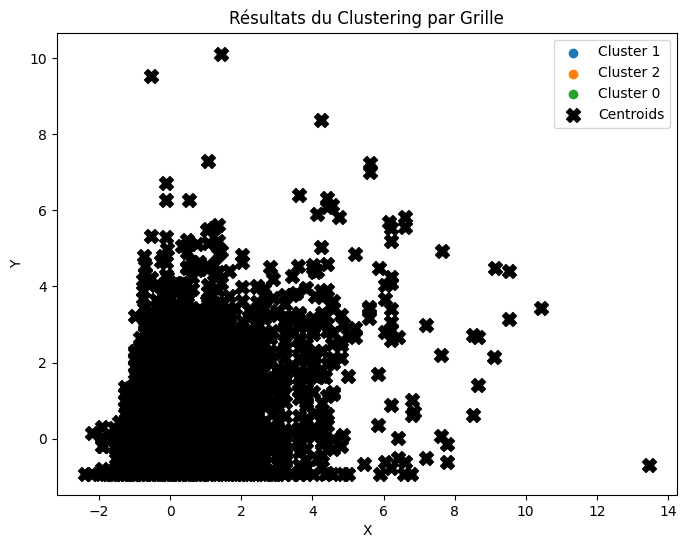

In [80]:
grid_clustering(normalize_data)

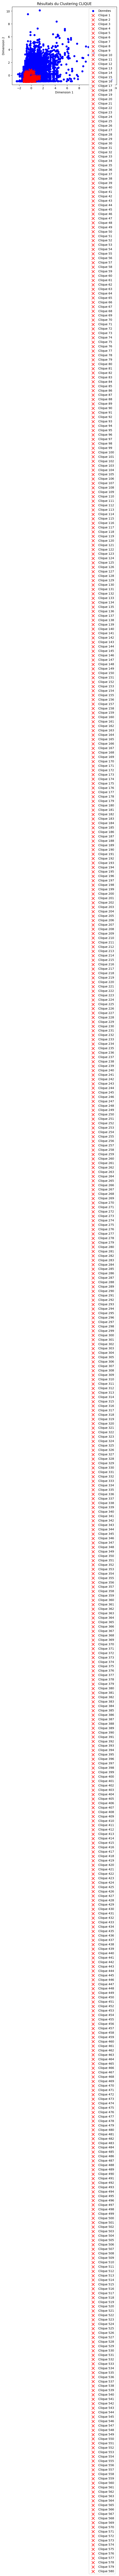

In [89]:
generate_cliques(normalize_data)

#### KMeans

Since almost all records have a DAT_DEB value of year 2013 and a DAT_FIN value of year 2014, there's no need for these features for clustering. More over, we can't use non-numerical features for k-means clustering. Let's remove them.

In [2]:
to_remove = ['DAT_DEB', 'DAT_FIN', 'SEXE', 'MARQUE', 'CD_USAG', 'CLASSE_sra']
at_data = pd.DataFrame(cleaned_data)
for _ in to_remove:
    at_data = at_data.drop(_, axis=1)

columns = at_data.columns
index = at_data.index
at_data = normalize(at_data)

at_data = pd.DataFrame(data=at_data, columns=columns, index=index)
at_data.head()

NameError: name 'pd' is not defined

Now, let's  build our clusters.

In [ ]:
labels = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=0).fit(at_data)
    labels.append(kmeans.labels_)

labels

Visualizing the results on a two axis plot.

In [ ]:
n = 2,
sns.scatterplot(at_data, x=at_data.columns[1], y=at_data.columns[6], hue=labels[n-2], palette=sns.color_palette('bright', n_colors=n))
plt.title("K-means clustering")
plt.show()

#### Evaluation
Now, we will evaluate the results using silhouette score

In [ ]:
for _ in range(len(labels)):
    s_score = silhouette_score(at_data, labels[_])
    print(f"For k = {_+1} Silhouette score = {s_score}")

Evaluating the results using Davies-Bouldin score:

In [ ]:
for _ in range(len(labels)):
    db_score = davies_bouldin_score(at_data, labels[_])
    print(f"For k = {_+1} Davies-Bouldin score = {db_score}")

We observe that the best clustering, accoring the both metrics and the plot is the one with 2 clusters.

#### DBSCAN

Let's first extract k and epsilon.<br>
    A rule of thumbs state that the minimumn points for a cluster should be higher than the considered dimensionality plus one. Here, we use all remaining 11 features so, the minimum points should be higher than 12. let's take k = 13.<br>
    Then, to choose a value for epsilon we will employ the NearestNeighbors algorithm with a predifined numbers of neighbors which is the minimum of points - 1. So there, will use k - 1 = 12 neighbors.<br>
    After finding the neigbors distances, we will order them in ascendingly and plot these distancs by the points. Looking at the plot, we will find where it looks like the bend of an elbow: the y-axis point that corresponds to that point is the suggested epsilon.

In [ ]:
nbrs = NearestNeighbors(n_neighbors=12).fit(at_data)
distances, indices = nbrs.kneighbors(at_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1] # we will plot only the smallest distances. The first columns value is 0.

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=0.000025, color='r', linestyle='--')
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show()

So, we will take epsilon = 0.000025.<br>
Lets build a DBSCAN model and cluster the datas.

In [ ]:
dbs = DBSCAN(eps=0.000025, min_samples=13).fit(at_data)
labels = dbs.labels_
labels

In [ ]:
noises = list(labels).count(-1)
print(f"Number of noise points : {noises}")

In [ ]:
n = len(np.unique(labels))
sns.scatterplot(at_data, x=at_data.columns[7], y=at_data.columns[9], hue=labels, palette=sns.color_palette('bright', n_colors=n))
plt.title("DBSCAN clustering")
plt.show()

#### Evaluation
Now, we will evaluate the results using silhouette score

In [ ]:
s_score = silhouette_score(at_data, labels)
print(f"Silhouette score = {s_score}")

Evaluating the results using Davies-Bouldin score:

In [ ]:
db_score = davies_bouldin_score(at_data, labels)
print(f"Davies-Bouldin score = {db_score}")

#### Subspace clustering